# 1️⃣ **Introduction to Multiple Linear Regression (MLR)**

**Definition**:
Multiple Linear Regression is a statistical technique used to model the relationship between **one dependent variable (Y)** and **two or more independent variables (X₁, X₂, ..., Xₙ).**

### **Mathematical Form of Multiple Linear Regression**

The equation of Multiple Linear Regression is:
- if the independent variables are 2 then this is the eq of plane
- but if the independent variable are 3 then it is called eq of hyperplane
- similarly it forms other different curvatures

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n + \epsilon
$$

Where:  

- $Y$ → Dependent variable (target)  
- $X_1, X_2, \dots, X_n$ → Independent variables (features)  
- $\beta_0$ → Intercept (constant term)  
- $\beta_1, \dots, \beta_n$ → Coefficients (how much $Y$ changes with $X_i$)  
- $\epsilon$ → Error term (residuals)  

**Key Idea:**  
MLR estimates coefficients ($\beta$) to **minimize the sum of squared errors** between actual and predicted $Y$.

<hr>


# 2️⃣ **Assumptions of Multiple Linear Regression**

### Before applying MLR, ensure these assumptions are reasonably satisfied:

1. **Linearity**: Relationship between independent variables and dependent variable is linear.

2. **Independence**: Observations are independent of each other.

3. **Homoscedasticity**: Residuals have constant variance.

4. **Normality**: Residuals(errors) are normally distributed.

5. **No multicollinearity**: Independent variables (predictors) are not highly correlated.

# 📘 Assumptions of Linear Regression

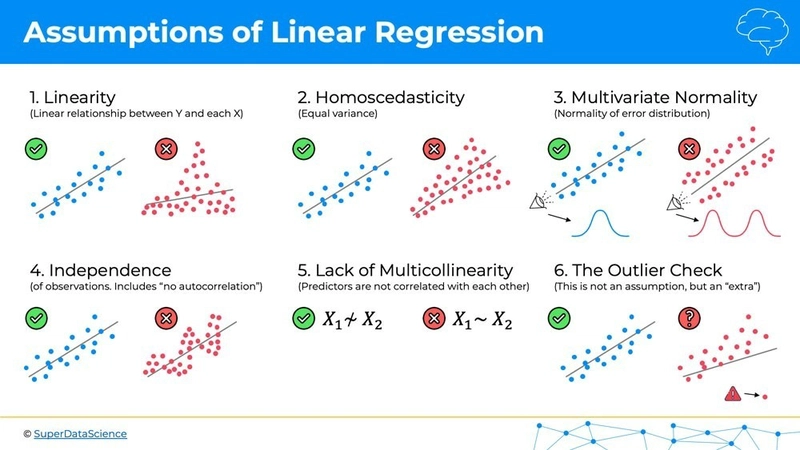

Linear Regression works best when certain statistical assumptions are satisfied.  
If these assumptions are violated, the model’s predictions or statistical inferences (like p-values, R²) can become unreliable.

---

## 1️⃣ Linearity
**Meaning:**  
There should be a linear relationship between the independent variable(s) (X) and the dependent variable (Y).  
That is, a change in X produces a proportional change in Y.

**Examples:**
- ✅ Example (Valid): Height vs Weight — taller people tend to weigh more linearly.  
- ❌ Example (Invalid): Age vs Happiness — the relationship might be curved (non-linear).

---

## 2️⃣ Independence of Errors
**Meaning:**  
The residuals (errors) should be independent of each other.  
That means the error from one observation should not influence the error of another.

**Examples:**
- ✅ Example: Randomly collected survey responses (independent samples).  
- ❌ Example: Time series data like stock prices — residuals are autocorrelated.

---

## 3️⃣ Homoscedasticity

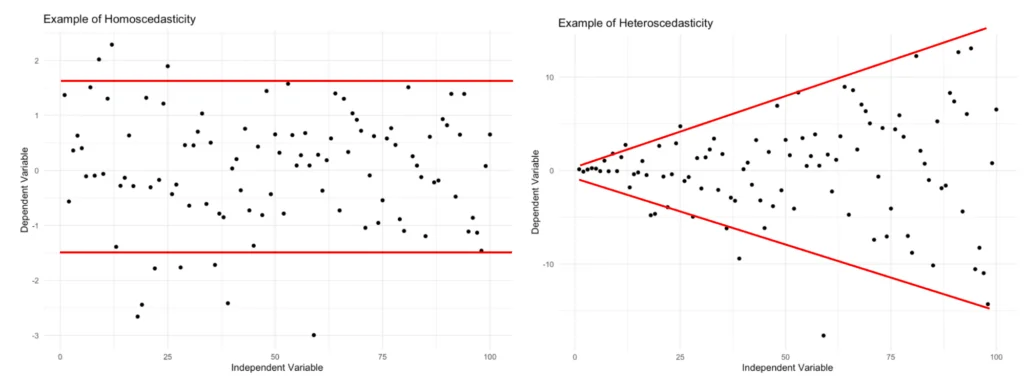

**Meaning:**  
The variance of residuals should remain constant across all levels of the independent variables.  
In other words, the spread of errors should be roughly the same throughout.

**Examples:**
- ✅ Example: Errors scattered evenly across all predicted values.  
- ❌ Example: Residuals fan out (increase) as predicted values increase — known as heteroscedasticity.

---

## 4️⃣ Normality of Residuals
**Meaning:**  
The residuals should follow a normal distribution (bell-shaped curve).  
This ensures that hypothesis tests (like t-test or F-test) are valid.

**Examples:**
- ✅ Example: Residual histogram looks symmetric and bell-shaped.  
- ❌ Example: Residuals are highly skewed (many large outliers).

---

## 5️⃣ No Multicollinearity (for Multiple Linear Regression)
**Meaning:**  
Independent variables should not be highly correlated with each other.  
High correlation makes it hard to distinguish their individual effects on Y.

**Examples:**
- ✅ Example: “Age” and “Education Level” are somewhat related but not redundant.  
- ❌ Example: “Years of Experience” and “Age” are highly correlated — causing multicollinearity.

---

## 6️⃣ No Autocorrelation (especially in Time Series)
**Meaning:**  
Residuals should not be correlated across time.  
Autocorrelation means the model misses some temporal structure in the data.

**Examples:**
- ✅ Example: Residuals appear random in time-series plot.  
- ❌ Example: Residuals follow a repeating pattern (like a wave).

---

## ✅ Bonus: No Significant Outliers
**Meaning:**  
Outliers can heavily influence the regression line and distort results.  
It’s important to detect and handle them properly.

**Examples:**
- ✅ Example: All points lie near the trend line.  
- ❌ Example: One data point lies far away and pulls the regression line toward itself.

---



# 3️⃣ **Steps to Perform Multiple Linear Regression in Python**

We usually use **statsmodels** or **sklearn** libraries. Let’s explain statsmodels first, because it gives detailed statistical output.

## ➡️ **Step1. Import Libraries**

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## ➡️ **Step2. Load Data**

In [81]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [82]:
df.shape

(30, 3)

## ➡️ Checking for null values in data

In [83]:
df.isnull().sum()

YearsExperience    0
Age                0
Salary             0
dtype: int64

## ➡️ Checking the Linearity of both the independent variables with respect to the dependent variable by using `sns.pairplot()`

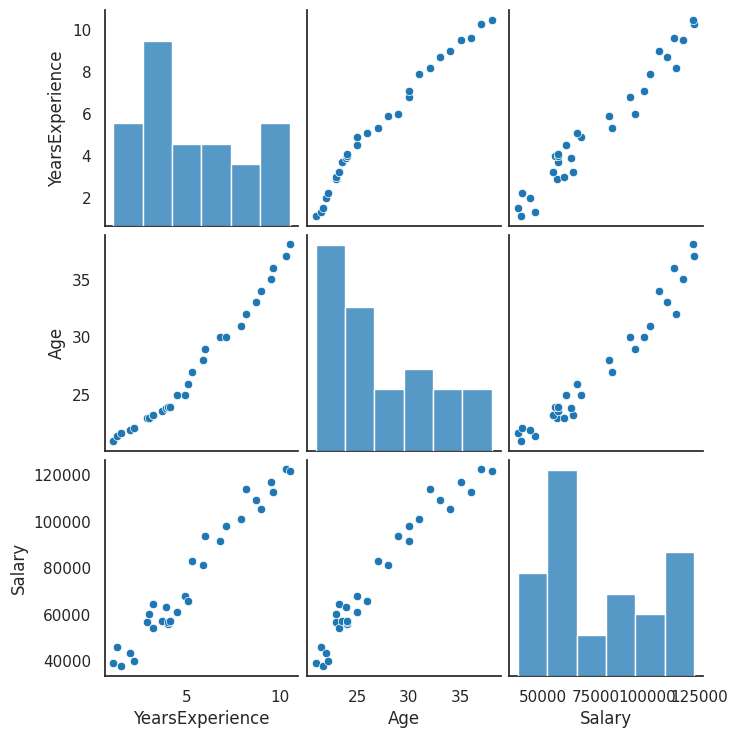

In [84]:
sns.pairplot(data = df,)

plt.show()

## ➡️ using heatmap with correlation to check the linearity of these variables with the target variable

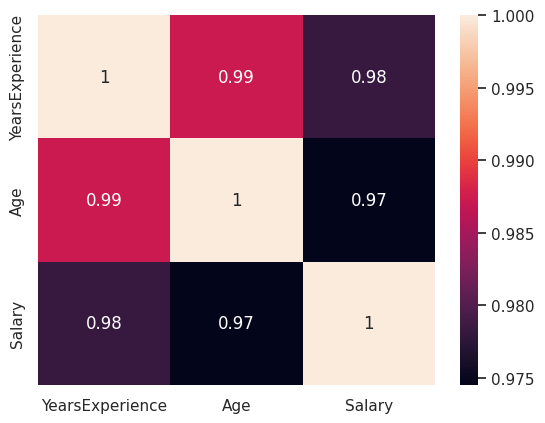

In [85]:
sns.heatmap(
    data = df.corr(), #using corr() method over the data
    annot = True, #this will give the annotation of correlation between them
    )

plt.show()

## ➡️ **Step3: Define Dependent and Independent Variables**

In [86]:
x = df.iloc[:,: - 1]
x.ndim

2

In [87]:
y = df["Salary"]
y.ndim

1

## ➡️ Now Splitting the data into training and testing sets

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 21)

## ➡️ Now Importing LinearRegression from linear_model module of sklearn library

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
lr = LinearRegression()

## **➡️ now `lr.fit(x,y)` will train the eq : $$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n + \epsilon $$ on the dataset to find the best values of different $$\beta_i (slopes) and \beta_0 (intercept) $$**

In [92]:
lr.fit(x_train, y_train)

LinearRegression()

## ➡️ Now checking the score

In [93]:
lr.score(x_test, y_test)

0.9409862667300515

## ➡️ Now Interpreting the Coefficients `y = m1x1 + m2x2 + c`

In [94]:
# y = m1x1 + m2x2 + c
lr.coef_

array([5770.34291987, 1994.50989264])

In [95]:
lr.intercept_

np.float64(-10052.54518418423)

In [96]:
# y_prd = 5770.34291987*Experience + 1994.50989264*Age - 10052.54518418423
yp = 5770.34291987*1.1 + 1994.50989264*21.0 - 10052.54518418423
print(yp)

38179.53977311277


In [97]:
df.head(3)

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731


In [98]:
lr.predict([[1.1 , 21.0]])

/home/akash/myEnv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([38179.53977304])

# 4️⃣ Checking Assumptions of Multiple Linear Regression

**These assumptions are what make Linear Regression statistically valid.**

### **🧩 Assumptions of Multiple Linear Regression**

| #   | Assumption             | Meaning                                                        |
| --- | ---------------------- | -------------------------------------------------------------- |
| 1️⃣ | Linearity              | Relationship between predictors (X) and response (Y) is linear |
| 2️⃣ | Independence           | Observations are independent of each other                     |
| 3️⃣ | Homoscedasticity       | Constant variance of residuals                                 |
| 4️⃣ | Normality of Residuals | Errors follow a normal distribution                            |
| 5️⃣ | No Multicollinearity   | Predictors are not highly correlated                           |

### **🧩 Assumptions Checks**

| # | Assumption            | How to Check             | What You Expect            |
| - | --------------------- | ------------------------ | -------------------------- |
| 1 | **Linearity**         | Actual vs Predicted plot | Straight diagonal trend    |
| 2 | **Independence**      | Residuals vs Index       | Random scatter             |
| 3 | **Homoscedasticity**  | Residuals vs Predicted   | Even spread around 0       |
| 4 | **Normality**         | Histogram / Q–Q Plot     | Bell shape / diagonal line |
| 5 | **Multicollinearity** | VIF values               | < 5 (preferably < 10)      |



## **🎯 1️⃣ Compute Predictions and Residuals then Check Linearity**

- **`Residuals = Y_actual - Y_predicted`**
- **Residual analysis ensures assumptions are valid.**

In [99]:
y_pred = lr.predict(x)
residuals = y - y_pred

#### Doing the linearity check once again but now in between y_pred and y

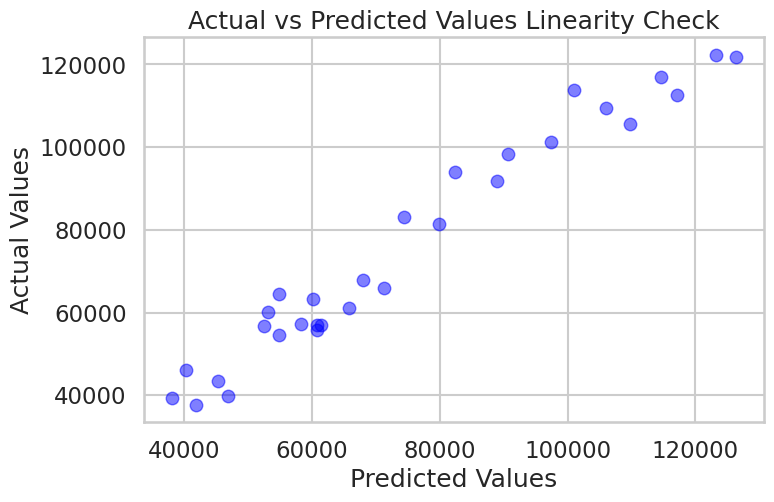

In [100]:
#doing the linearity check once again but now in between y_pred and y

plt.figure(figsize = (8,5))
sns.set_style("whitegrid")
sns.set_context("talk")

sns.scatterplot(
    x = y_pred, 
    y = y, 
    color = 'blue', 
    marker = 'o', 
    edgecolor = 'blue', 
    alpha = 0.5, 
    linewidth = 1
    )

plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Actual vs Predicted Values Linearity Check")
plt.show()


### **Interpretation:**

- Points should roughly form a **straight diagonal line.**

- If you see curves or patterns → relationship may not be linear (consider polynomial regression).

## 🔄 2️⃣ **Check Independence of Residuals**

##### ✅ Method:

Plot residuals over observation order (or use Durbin-Watson test).

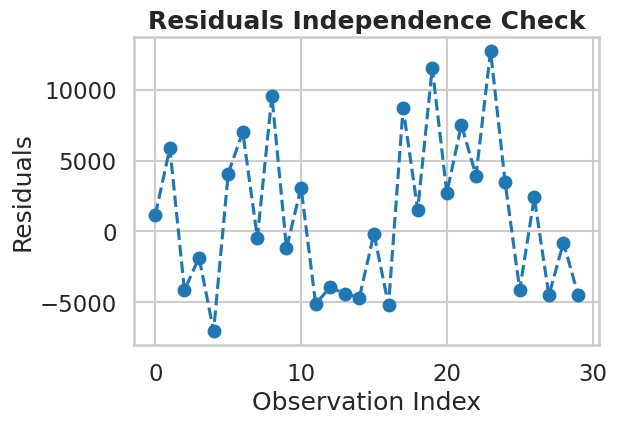

In [101]:
plt.figure(figsize = (6,4))
plt.plot(residuals, marker = 'o', linestyle = '--') # when given the single data input is given plot(takes it as y)
plt.title("Residuals Independence Check", fontweight = 'bold')
plt.xlabel("Observation Index")
plt.ylabel("Residuals")
plt.show()



### **Interpretation**:

- Residuals should appear **randomly scattered** (no pattern).

- If residuals show trends (wave or cycles), it violates independence (common in time-series)

## 📈 3️⃣ **Check Homoscedasticity (Constant Variance)**

##### ✅ Method:

**Plot residuals vs predicted values.**

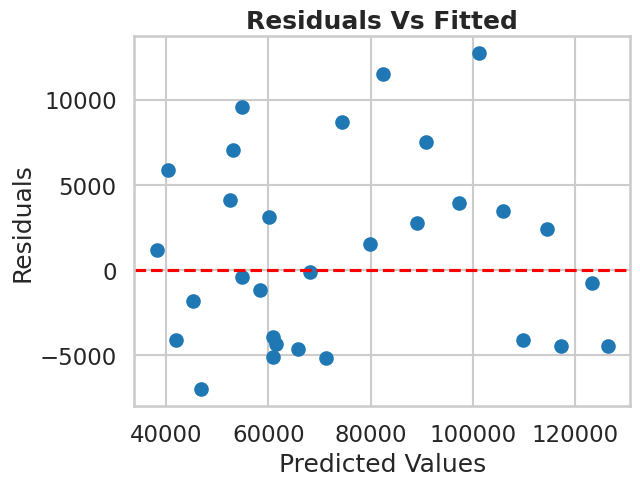

In [102]:
# Residual Plot

plt.scatter(y_pred, residuals)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Vs Fitted", fontweight = 'bold')
plt.show()

### 🌟🌟🌟 Interpretation of the above plot

1. **Linearity (Assumption Met)**

- **What to look for**: A random scatter of points centered around the horizontal red line at $\text{Residuals} = 0$.
- **Residual Plot**: The points are scattered randomly above and below the zero line across the entire range of predicted values.
- **Interpretation**: There is no obvious curved pattern (like a U-shape). This is excellent. It means the linear relationship your model is based on is appropriate for your data.

2. **Homoscedasticity (Assumption Met)**

- **What to look for**: The vertical spread (variance) of the points should be roughly the same from the left side of the plot to the right side. The opposite of this is a "cone" or "fan" shape, which indicates heteroscedasticity.
- **Residual Plot**: The vertical spread of your residuals is **roughly constant**. The errors at the low end of predictions (e.g., 40k-60k) have a similar spread to the errors at the high end (e.g., 100k-120k).
- **Interpretation**: This is also excellent. It means the model's errors are consistent, and the assumption of **homoscedasticity** (constant variance) is met. This is crucial for trusting the p-values and confidence intervals of your model's coefficients.

## 📊 4️⃣ Check Normality of Residuals

##### ✅ Method 1: Histogram + KDE Plot

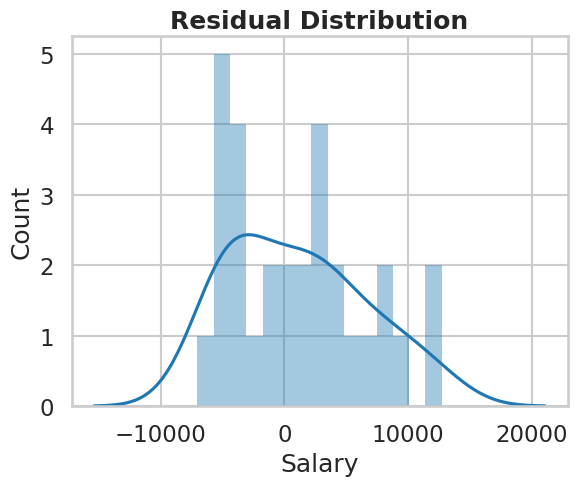

In [103]:
# Distribution (hist) plot of residuals
sns.histplot(
    residuals,
    kde = True,
    stat = "count",
    # stat = "density",
    kde_kws = dict(cut = 3),
    edgecolor = (1,1,1,0),
    alpha = 0.4,
    bins = 15
    
)

plt.title("Residual Distribution",fontweight = "bold")
plt.show()

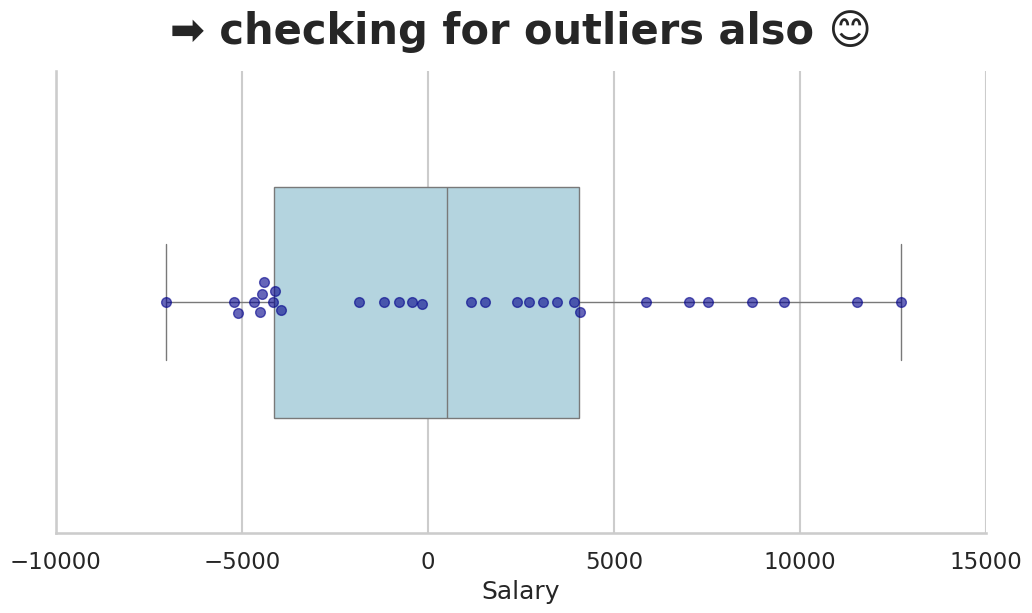

In [104]:
plt.figure(figsize = (12,6))
plt.xlim(left = -10000, right = 15000)
plt.title("➡️ checking for outliers also 😊", fontweight = "bold", fontsize = 30, pad = 20)
sns.set_context("notebook")
sns.set_style("white")

sns.boxplot(
    residuals,
    color = "lightblue",
    width = 0.5,
    orient='h', # orient = 'h' is used for the horizontal orientation of the plot
    zorder = 1,
)

sns.swarmplot(
    residuals,
    color = 'darkblue',
    size = 7,
    alpha = 0.6,
    edgecolor='darkblue',
    orient = 'h', # to keep the collective plot in horizontal fashion we have to pass this argument in both the plot
    linewidth = 1,
    zorder = 2
)

sns.despine()
plt.show()

##### ✅ Method 2: Q–Q Plot (Quantile-Quantile)

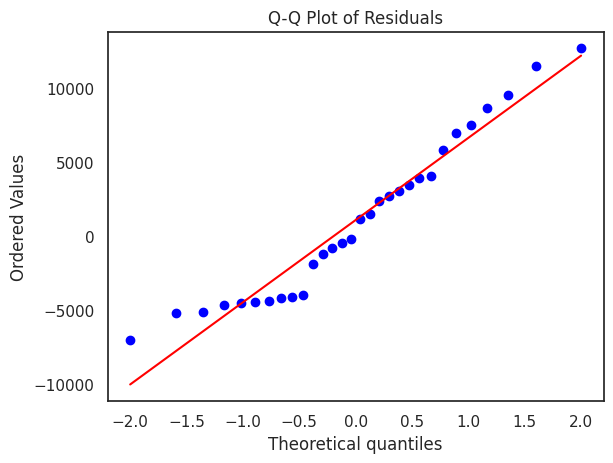

In [105]:
import scipy.stats as stats

stats.probplot(residuals, dist = 'norm', plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

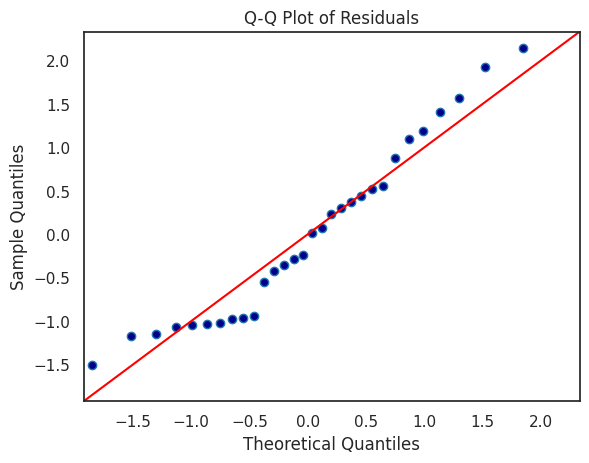

In [106]:
# already imported above : import statsmodels.api as sm

sm.qqplot(residuals, line = '45', fit = True, markerfacecolor = 'darkblue')
plt.title("Q-Q Plot of Residuals")
plt.show()



### 🌟🌟🌟 Interpretation of the Plot

#### 1️⃣ What the plot shows

- **X-axis (Theoretical Quantiles)**: Expected quantiles if the residuals were perfectly normally distributed.

- **Y-axis (Sample Quantiles)**: Actual quantiles of your regression residuals.

- **Red line**: Represents the ideal normal distribution. If residuals are perfectly normal, all points lie exactly on this line.

#### 2️⃣ How to interpret it

- **Points closely following the red line**: Residuals are approximately normally distributed.

- **Points deviating from the line at the ends (tails)**: Indicates some skewness or heavy/light tails compared to normal distribution.

- **S-shaped curve**: Suggests skewness in residuals.

- **Upward/downward curves at ends**: Suggests heavier or lighter tails than normal.

####  3️⃣ Observations for your plot

- Most points **closely follow the red line**, **indicating** that residuals are **roughly normally distributed**.

- **Minor deviations** at the extremes (very high or low residuals) are visible, but these **are often acceptable in practice**.

✅ **Conclusion**: **The normality assumption of residuals in our simple linear regression seems reasonably satisfied. This supports the validity of confidence intervals, hypothesis tests, and other inference based on this regression.**


<br>
<hr>

# 🧠 **Understanding the Two Functions**

## 1️⃣ **Using `statsmodels.api.qqplot()`**

```python
    import statsmodels.api as sm

    sm.qqplot(residuals, line='45', fit=True, markerfacecolor='darkblue')

```

### 🔍 **What happens inside**:

1. **Takes your residuals** (a 1D array).

2. **Sorts** them in ascending order.

3. **Generates theoretical quantiles from the normal distribution **(by default).

    - Equivalent to saying: “**If residuals were normal, what quantiles would they have?**”

4. **Fits** a line (optional `fit=True`):

    - It scales and centers the residuals to best match a normal distribution.

    - In essence, it applies a linear transformation:

    $$𝑧 = 𝑎 + 𝑏 × 𝑟𝑒𝑠𝑖𝑑𝑢𝑎𝑙$$
    - so that the fitted line represents the best match.

5. **Plots** your sample quantiles (Y-axis) vs theoretical quantiles (X-axis).

6. The argument `line='45'` adds a **45° reference line (y = x) for visual comparison**.

#### **Customization options (StatsModels):**

- `line='45'`: 45° line.

- `line='s'`: standardized line.

- `line='r'`: regression line through the points.

- `fit=True`: standardizes the data to have mean=0, std=1.

#### 📘 **In short**:
👉 `sm.qqplot()` is a **high-level helper** built specifically for **statistical model diagnostics** — it’s tightly integrated with regression analysis.



<br>
<hr>

## **2️⃣ Using `scipy.stats.probplot()`**

```python
    from scipy import stats
    import matplotlib.pyplot as plt

    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title("Q-Q Plot of Residuals")
    plt.show()
```
### 🔍 **What happens inside:**

1. **Computes theoretical quantiles** for a given distribution (default = normal).

2. **Sorts your residuals** to create ordered sample quantiles.

3. **Performs a least-squares fit line:**

    $$𝑦 = 𝑠𝑙𝑜𝑝𝑒 × 𝑥 + 𝑖𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡$$

   - `slope` and `intercept` are printed in the console output (that’s one difference).

If `plot=plt` is provided, it automatically plots using Matplotlib.

Otherwise, it only returns `(theoretical_quantiles, ordered_residuals, (slope, intercept, r))`.

#### 📘 In short:
👉 `stats.probplot()` is a **generic quantile plotting function for any distribution (not just normal).**
**It is lower-level and more flexible but doesn’t have the automatic formatting of sm.qqplot().**


<br>
<hr>

# 🆚 Comparison Table

| Feature          | `sm.qqplot()` (StatsModels)           | `stats.probplot()` (SciPy)             |
| ---------------- | ------------------------------------- | -------------------------------------- |
| **Library**      | `statsmodels.api`                     | `scipy.stats`                          |
| **Purpose**      | Diagnostic tool for regression models | Generic quantile comparison            |
| **Default dist** | Normal                                | Normal (can change via `dist`)         |
| **Fitting line** | Optional (`fit=True`)                 | Always fits line & returns parameters  |
| **Line options** | '45', 'r', 's', 'q'                   | Single regression fit only             |
| **Output**       | Matplotlib plot                       | Plot + (quantiles, fit stats)          |
| **Usage**        | Quick diagnostic for residuals        | More customizable for any distribution |





# 🔗 5️⃣ **Check for Multicollinearity**

##### Multicollinearity occurs when predictors (independent variables) are highly correlated — this can make coefficients unstable.

##### We use **Variance Inflation Factor (VIF)**.


## ➡️ **Import Variation Inflation Factor from `statsmodels.stats.outliers_influne`**

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

## ➡️ **Add constant to X for VIF Calculation**

In [108]:
x_with_const = sm.add_constant(x_train)

vif_data = pd.DataFrame()

vif_data["Feature"] = x_with_const.columns

# for i in range(x_with_const.shape[1]): ## X_with_const.shape[1] → Number of columns = 3 
    # print(f"outpur ---> {i}") ## so it becomes for i in range(3) thats why loop iterates from 0 -> 1 -> 2

vif_data["VIF"] = [VIF(x_with_const.values, i) for i in range(x_with_const.shape[1])]
# VIF takes two para : ndarry/DataFrame(x_with_const.values), index of exogenous variable (i)

print(vif_data)

           Feature         VIF
0            const  482.439068
1  YearsExperience   37.620080
2              Age   37.620080


### **Interpretation**:

**VIF = 1 → No correlation**

**VIF between 1–5 → Moderate correlation (acceptable)**

**VIF > 10 → High multicollinearity (problematic → remove or combine features)**

### 🌟🌟🌟 **NOTE FOR VIF** **Variation Inflation Factor**

```python
(function) def VIF(
    exog,
    exog_idx
) -> Any
```

➡️ Variance inflation factor, VIF, for one exogenous variable
The variance inflation factor is a measure for the increase of the variance of the parameter estimates if an additional variable, given by exog_idx is added to the linear regression. It is a measure for multicollinearity of the design matrix, exog.

One recommendation is that if VIF is greater than 5, then the explanatory variable given by exog_idx is highly collinear with the other explanatory variables, and the parameter estimates will have large standard errors because of this.

#### **Parameters**
exog : {ndarray, DataFrame}
design matrix with all explanatory variables, as for example used in regression

exog_idx : int
index of the exogenous variable in the columns of exog

#### **Returns**
float
variance inflation factor

## 🧠 **Explanation For The Above CODE**

### 1) What each line does (plain explanation)

- `from statsmodels.stats.outliers_influence import variance_inflation_factor
Imports the helper` function that computes the VIF for a given column (variable) in a design matrix.

- `X_with_const = sm.add_constant(X_train)`
Adds a column of ones (an intercept) to the predictor matrix `X_train`, returning a new DataFrame/array where the first column is `const` (unless your data already had one). This yields the design matrix used for VIF calculation.

- `vif_data = pd.DataFrame()`
Creates an empty DataFrame to store feature names and VIF values.

- `vif_data["Feature"] = X_with_const.columns`
Stores the column names (e.g., const, Area, Bedrooms, ...) for human-readable output.

- `vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]`
For each column index` i `in the design matrix, call `variance_inflation_factor` with the full matrix `(X_with_const.values)` and the column index i. This computes VIF for that column and stores the result in the DataFrame.

- `print(vif_data)`
Prints a table of features and their VIF values.

<br>
<hr>

## 2) What is VIF conceptually?

**Variance Inflation Factor (VIF)** measures how much the variance (square of standard error) of an estimated regression coefficient is “inflated” because of linear relationships (multicollinearity) among the predictors.

- If a predictor is nearly uncorrelated with other predictors → **VIF ≈ 1** (no inflation).

- If a predictor is highly predictable from other predictors → **VIF ≫ 1**(inflation).

High VIF ⇒ the coefficient estimate is unstable and has a large standard error, so hypothesis tests for that coefficient are unreliable.

<br>
<hr>

## 📘 Exact Mathematical Definition of Variance Inflation Factor (VIF)

For a given predictor \( X_j \), define \( R_j^2 \) as the **coefficient of determination** obtained when **regressing \( X_j \)** on **all the other predictors** (including the intercept if present).  

Then the **Variance Inflation Factor (VIF)** for predictor \( j \) is given by:

$$
\text{VIF}_j = \frac{1}{1 - R_j^2}
$$

---

### 🔍 Meaning of Each Term

- \( X_j \) → The \( j^{th} \) independent variable (feature).  
- \( R_j^2 \) → The coefficient of determination (how well \( X_j \) can be linearly predicted using all the other predictors).  
- \( \text{VIF}_j \) → The amount by which the variance of \( \hat{\beta}_j \) (the estimated coefficient) is inflated due to multicollinearity.  

---

### 💡 Interpretation

- If \( R_j^2 = 0 \):  
  \( X_j \) is **not linearly related** to any other predictor.  
  Hence,
  $$
  \text{VIF}_j = \frac{1}{1 - 0} = 1
  $$
  → No multicollinearity.

- If \( R_j^2 = 0.8 \):  
  \( X_j \) is **highly correlated** with other predictors.  
  Hence,
  $$
  \text{VIF}_j = \frac{1}{1 - 0.8} = 5
  $$
  → Indicates **significant multicollinearity**.

---

### ⚙️ Related Measure — Tolerance

Tolerance is simply the reciprocal of VIF:

$$
\text{Tolerance}_j = 1 - R_j^2 = \frac{1}{\text{VIF}_j}
$$

- Low Tolerance (≈ 0) → High multicollinearity.  
- High Tolerance (≈ 1) → Low multicollinearity.

---

### 🧠 In Simple Words

- \( R_j^2 \) tells how much of \( X_j \)'s variance is explained by the other predictors.  
- \( \text{VIF}_j \) tells **how much the variance of \( \hat{\beta}_j \)** (coefficient of \( X_j \)) is **inflated** due to correlation with other predictors.  

Higher \( R_j^2 \) → Higher \( \text{VIF}_j \) → Greater multicollinearity.




## 4) Why does that relate to variance of coefficient estimates?

The Ordinary Least Squares (OLS) estimator for regression coefficients is given by:

$$
\hat{\beta} = (X^\top X)^{-1} X^\top y
$$

✅ **Explanation**:  
This is the formula used in linear regression to estimate the coefficients (**β-hat**).  
- \( X \) → matrix of predictors (independent variables)  
- \( y \) → vector of target (dependent variable)  
- \( X^\top \) → transpose of X  
- \( (X^\top X)^{-1} \) → inverse of \( X^\top X \)

---

Now, the **covariance matrix** of these estimated coefficients (assuming homoscedastic errors with variance \( \sigma^2 \)) is:

$$
\mathrm{Var}(\hat{\beta}) = \sigma^2 (X^\top X)^{-1}
$$

✅ **Explanation**:  
This tells us how much the estimated coefficients \( \hat{\beta} \) would vary if we repeated the sampling process many times.  
- \( \sigma^2 \) represents the variance of the residuals (noise).  
- The term \( (X^\top X)^{-1} \) captures the influence of correlations among predictors on this variance.

---

For the **j-th coefficient**, the corresponding diagonal element (let’s call it \( C_{jj} \)) of \( (X^\top X)^{-1} \) determines its variance:

$$
\mathrm{Var}(\hat{\beta}_j) = \sigma^2 \, C_{jj}
$$

✅ **Explanation**:  
Each coefficient \( \hat{\beta}_j \) has its own variance that depends on:  
- The residual variance \( \sigma^2 \)  
- How correlated the predictor \( X_j \) is with other predictors (reflected in \( C_{jj} \))

---

If predictors are **highly correlated**, the matrix \( X^\top X \) becomes **ill-conditioned** (its inverse has large values).  
Hence, the elements of \( (X^\top X)^{-1} \) — particularly \( C_{jj} \) — become large, increasing \( \mathrm{Var}(\hat{\beta}_j) \).

Mathematically, when predictors are standardized, the **variance inflation factor (VIF)** quantifies this increase:

$$
\text{VIF}_j = \frac{1}{1 - R_j^2}
$$

✅ **Explanation**:  
- \( R_j^2 \) is the R-squared value obtained when regressing \( X_j \) on all other predictors.  
- If \( X_j \) is strongly correlated with others, \( R_j^2 \) → high → denominator \( (1 - R_j^2) \) → small → VIF → large.  
- Hence, large VIF means large variance of \( \hat{\beta}_j \).

---

Finally, the **mathematical relationship** can be summarized as:

$$
\text{VIF}_j \approx 
\frac{
\mathrm{Var}(\hat{\beta}_j \text{ when predictors are correlated})
}{
\mathrm{Var}(\hat{\beta}_j \text{ if } X_j \text{ were uncorrelated with others})
}
$$

✅ **Interpretation**:  
The **VIF** represents how much the variance of a regression coefficient is **inflated** due to multicollinearity.  
If predictors were completely independent, VIF = 1.  
If predictors are correlated, VIF > 1 — the higher it is, the worse the multicollinearity problem.


## 5) How does `variance_inflation_factor` compute it internally?

For a given column index \( i \), the function `variance_inflation_factor(X, i)` essentially performs the following steps:

1. Extracts column \( i \) of the matrix \( X \), call it \( x_i \).

2. Constructs \( X_{-i} \), the matrix of all other columns (including the constant if present).

3. Fits the regression:

   $$
   x_i = X_{-i} \, \gamma + \text{error}
   $$

   using Ordinary Least Squares (OLS).

4. Computes the coefficient of determination for this regression:

   $$
   R_i^2
   $$

5. Returns the Variance Inflation Factor (VIF) as:

   $$
   \text{VIF}_i = \frac{1}{1 - R_i^2}
   $$

Because it fits a regression of one predictor on all the others, this directly measures how much the variance of that predictor is explained by the others — hence quantifying **multicollinearity**.

<br>
<hr>


## 6) Why add a constant (`sm.add_constant`)? Does it matter?

- Adding a constant inserts an intercept column (all ones).  
  When computing VIF for predictors, it’s common to include the intercept column in the design matrix supplied to the VIF function.

- The intercept column itself will typically have a VIF computed by the function, but that VIF is **not meaningful** and can be ignored.

- Having the intercept in the design matrix ensures the auxiliary regressions (predictor on others) include an intercept, which is the normal way to compute \( R_j^2 \).  
  Omitting an intercept could change the computed \( R^2 \) values, especially if predictors are not mean-centered.

In short: include the constant so the auxiliary regressions are run with an intercept (standard practice);  
discard the `const` VIF when interpreting.

---


## 7) Interpretation & Thresholds (Practical)

- $( \text{VIF} \approx 1 )$ → No multicollinearity  
- $( 1 < \text{VIF} < 5 )$ → Moderate correlation (usually acceptable)  
- $( \text{VIF} > 5 )$ → Potentially problematic multicollinearity (some use $( > 5 )$, others $( > 10 ))$  
- $( \text{VIF} > 10 )$ → Definitely problematic in many contexts  


Remember: these thresholds are **rules of thumb**, not strict mathematical laws.  
Always interpret VIF values in **context** — depending on the dataset and domain.

---

## 8) Consequences of high VIF / multicollinearity

- **Large standard errors for coefficients** → wide confidence intervals.

- **Coefficients unstable**(small data changes produce big coefficient swings).

- **Insignificant t-tests** for coefficients that are actually important.

- Predictions may still be fine (multicollinearity hurts interpretability more than predictive power), but coefficient interpretation becomes unreliable.

---

## 9) Remedies when $( \text{VIF})$ is high

- **Remove one (or more) correlated predictors** that are redundant.  

- **Combine features** (e.g., sum or mean) or create **principal components (PCA)**.  

- **Regularization** (Ridge regression) shrinks coefficients and reduces variance —  
  this does not *remove* multicollinearity but mitigates its effect.

- **Centering / standardizing** predictors can help interpretability  
  and sometimes numeric conditioning (but won’t remove collinearity).

- **Domain knowledge** — decide which correlated variable is more meaningful and keep that one.

---

## 10) Numerical Intuition (Small Example)

Suppose for predictor \( X_2 \), you regress it on other predictors and obtain:

$$
R_2^2 = 0.9
$$

Then, the Variance Inflation Factor (VIF) for that predictor is:

$$
\text{VIF}_2 = \frac{1}{1 - 0.9} = 10
$$

**Interpretation:**  
The sampling variance of $( \hat{\beta}_2 )$ is inflated by a factor of **10** due to linear dependence with the other predictors.  
That means your standard error is:

$$
\sqrt{10} \approx 3.16
$$

times larger than it would be if \( X_2 \) were orthogonal (uncorrelated) to the others.

---


## **11)** **Extra: Matrix Perspective & Condition Number (Advanced)**

- The **condition number** of \( X^\top X \) (or of the standardized \( X \)) measures how close that matrix is to being singular.  
  A high condition number \( \Rightarrow \) near-linear dependence among columns.

- The Variance Inflation Factor (VIF) looks at each variable **individually** by measuring how well it’s predicted by the others (a **single-column** view).  
  The **condition number** and **eigenvalues** give a **global** view of multicollinearity.

- If some eigenvalues of \( X^\top X \) are very small, then the inverse \( (X^\top X)^{-1} \) becomes unstable —  
  leading to **large variances** of the estimated coefficients.

---

## **12)** **Practical notes about the code & output**

- `variance_inflation_factor` expects a 2D array (design matrix). Passing `X_with_const.values` is correct.

- The list comprehension iterates indices `0 .. p` (where `p` is number of columns including constant).

- You will often see a `const` row in output — ignore that VIF.

- If your predictors include categorical variables encoded as multiple dummy columns, those dummy columns might show multicollinearity (especially if you forgot to drop one dummy or dropped the intercept incorrectly).

---

## **13) Short checklist for using this snippet responsibly**

1. Add constant: `X_with_const = sm.add_constant(X_train)` (so auxiliary regressions have an intercept).

2. Run VIF computation: get VIFs for each column.

3. Inspect VIFs (ignore `const`): mark features with large VIFs.

4. Diagnose using correlation matrix, pairplots, or check eigenvalues/condition number.

5. Decide: drop/merge/regularize/transform features as needed.

6. Recompute VIFs after changes.

# **🧮 6: Optional — Durbin-Watson Test**

##### **To statistically test independence (autocorrelation) between the residuals**


In [109]:
from statsmodels.stats.stattools import durbin_watson

In [110]:
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_stat}")

Durbin-Watson Statistic: 1.631143074539275


### **Interpretation:**

- **DW ≈ 2 → No autocorrelation (good)**

- **DW < 1.5 → Positive correlation in residuals**

- **DW > 2.5 → Negative correlation in residuals**

# ✅ Summary of Assumption Checks

| # | Assumption            | How to Check             | What You Expect            |
| - | --------------------- | ------------------------ | -------------------------- |
| 1 | **Linearity**         | Actual vs Predicted plot | Straight diagonal trend    |
| 2 | **Independence**      | Residuals vs Index       | Random scatter             |
| 3 | **Homoscedasticity**  | Residuals vs Predicted   | Even spread around 0       |
| 4 | **Normality**         | Histogram / Q–Q Plot     | Bell shape / diagonal line |
| 5 | **Multicollinearity** | VIF values               | < 5 (preferably < 10)      |
